In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import helper_functions as helper

import field_map_config_run1 as config

Welcome to JupyROOT 6.22/02


In [2]:
count = 0

N = 20
m_diffs = np.empty([72,5,N,12])  # 12 total pairs including 1c4


for run in config.runs:
    for key in config.pair_dict[run]:
        
        # import data from 60 hr trolley run and fixed probe run
        
        print run + ': '+ key
        
        filename = config.interp_file_dict[run]
        fp_interp_df = pd.read_hdf(filename, key=key)
        fp_moment_df = helper.calc_moment_df(fp_interp_df)
        
        ## in for loop, generate fake data set, average the replacement data and real data, and look at difference
        for ii in range(N):

            print ii

            # look at length of tr runs, pick random starting point in fixed probe run to call fake trolley
            # trolley moment dfs are 4300-4400 seconds long

            duration = np.random.randint(4300,4401)
            start = np.random.randint(0, fp_moment_df.shape[0]-duration)
            fake_tr_run = fp_moment_df.iloc[start:start+duration].copy()

            # trolley runs start at 262.2 deg and end at 262.7 deg

            tr_phi = (np.linspace(262.2, 262.7+360, duration) + np.random.uniform(-0.03,0.03,))%360
            fake_tr_run['tr_phi'] = tr_phi

            corr_df = helper.trolley_footprint_replacement(fake_tr_run)
            print

            for m in range(17):
                fake_tr_run['tr,m'+str(m+1)] = 0
                corr_df['tr,m'+str(m+1)] = 0

            _, fp_baseline_real, _, _, _ = helper.trolley_run_station_average(fake_tr_run)
            _, fp_baseline_corr, _, _, _ = helper.trolley_run_station_average(corr_df)

            m_diffs[:,:,ii,count] = fp_baseline_corr - fp_baseline_real
            
        count = count+1


1a: fp_df_1
Finished calculating all moments for 257281 events.    
0
Removing trolley image from station 71.             
1
Removing trolley image from station 71.              
2
Removing trolley image from station 71.             
3
Removing trolley image from station 71.             
4
Removing trolley image from station 71.             
5
Removing trolley image from station 71.             
6
Removing trolley image from station 71.             
7
Removing trolley image from station 71.             
8
Removing trolley image from station 71.             
9
Removing trolley image from station 71.             
10
Removing trolley image from station 71.             
11
Removing trolley image from station 71.             
12
Removing trolley image from station 71.             
13
Removing trolley image from station 71.             
14
Removing trolley image from station 71.             
15
Removing trolley image from station 71.             
16
Removing trolley image from station 71.   

Removing trolley image from station 71.            
1d: fp_df_5
Finished calculating all moments for 268591 events.     
0
Removing trolley image from station 71.              
1
Removing trolley image from station 71.             
2
Removing trolley image from station 71.             
3
Removing trolley image from station 71.             
4
Removing trolley image from station 71.             
5
Removing trolley image from station 71.             
6
Removing trolley image from station 71.             
7
Removing trolley image from station 71.             
8
Removing trolley image from station 71.               
9
Removing trolley image from station 71.             
10
Removing trolley image from station 71.             
11
Removing trolley image from station 71.             
12
Removing trolley image from station 71.             
13
Removing trolley image from station 71.             
14
Removing trolley image from station 71.             
15
Removing trolley image from station 71.    

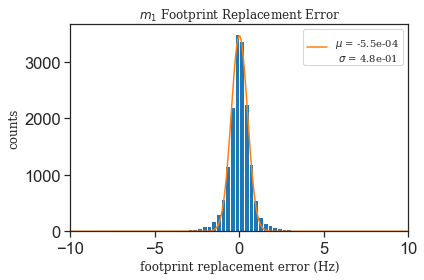

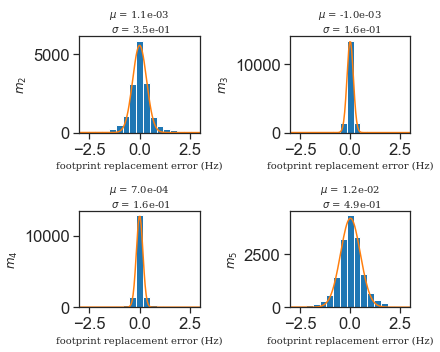

In [4]:
m=0

m1_diffs = m_diffs[:,m,:,:].flatten()

def gaussian(x, A, x0, s): return A * np.exp(-(x-x0)**2/(2*s**2))

fig2, ax2 = plt.subplots(1,1)

out = ax2.hist(m1_diffs, bins=5000)
counts = out[0]
bins = (out[1][1:]+out[1][:-1])/2

fit, _ = curve_fit(gaussian, bins, counts)

ax2.plot(np.linspace(-25,25,1000), gaussian(np.linspace(-25,25,1000), *fit),
         label=('$\mu$ = %.1e \n $\sigma$ = %.1e'%(fit[1],fit[2])))
ax2.set_xlim(-10,10)
ax2.legend(prop={'size':10, 'family':'serif'})

ax2.set_title('$m_1$ Footprint Replacement Error', fontdict={'size':12, 'family':'serif'})
ax2.set_xlabel('footprint replacement error (Hz)', fontdict={'size':12, 'family':'serif'})
ax2.set_ylabel('counts', fontdict={'size':12, 'family':'serif'})

fig2.set_size_inches(6,4)
fig2.tight_layout()

# print fit

# fig2.savefig('replacement_m1_hist.png', dpi=300)

fig3, ax3 = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        m = 2*i + j
        diffs = m_diffs[:,m+1,:].flatten()
        
        out = ax3[i,j].hist(diffs, bins=np.linspace(-10,10, 60))
        counts = out[0]
        bins = (out[1][1:]+out[1][:-1])/2

        fit, _ = curve_fit(gaussian, bins, counts)

        ax3[i,j].plot(np.linspace(-25,25,1000), gaussian(np.linspace(-25,25,1000), *fit))
        ax3[i,j].set_title(('$\mu$ = %.1e \n $\sigma$ = %.1e'%(fit[1],np.abs(fit[2]))), fontdict={'size':10, 'family':'serif'})
        ax3[i,j].set_xlim(-3,3)
        ax3[i,j].set_xlabel('footprint replacement error (Hz)', fontdict={'size':10, 'family':'serif'})
        ax3[i,j].set_ylabel('$m_'+str(m+2)+'$', fontdict={'size':12, 'family':'serif'})

fig3.set_size_inches(6,5)
fig3.tight_layout()

# fig3.savefig('replacement_m2-5_hist.png', dpi=300)


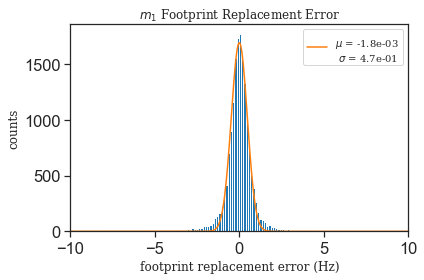

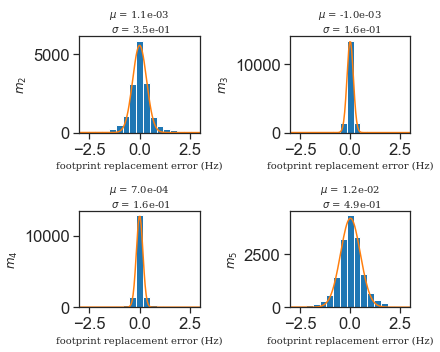

In [10]:
m1_diffs_san = m1_diffs[np.abs(m1_diffs - np.mean(m1_diffs)) < 3*np.std(m1_diffs)]

m=0

m1_diffs = m_diffs[:,m,:,:].flatten()

def gaussian(x, A, x0, s): return A * np.exp(-(x-x0)**2/(2*s**2))

fig2, ax2 = plt.subplots(1,1)

out = ax2.hist(m1_diffs_san, bins=500)
counts = out[0]
bins = (out[1][1:]+out[1][:-1])/2

fit, _ = curve_fit(gaussian, bins, counts)

ax2.plot(np.linspace(-25,25,1000), gaussian(np.linspace(-25,25,1000), *fit),
         label=('$\mu$ = %.1e \n $\sigma$ = %.1e'%(fit[1],fit[2])))
ax2.set_xlim(-10,10)
ax2.legend(prop={'size':10, 'family':'serif'})

ax2.set_title('$m_1$ Footprint Replacement Error', fontdict={'size':12, 'family':'serif'})
ax2.set_xlabel('footprint replacement error (Hz)', fontdict={'size':12, 'family':'serif'})
ax2.set_ylabel('counts', fontdict={'size':12, 'family':'serif'})

fig2.set_size_inches(6,4)
fig2.tight_layout()

# print fit

# fig2.savefig('replacement_m1_hist.png', dpi=300)

fig3, ax3 = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        m = 2*i + j
        diffs = m_diffs[:,m+1,:].flatten()
        
        out = ax3[i,j].hist(diffs, bins=np.linspace(-10,10, 60))
        counts = out[0]
        bins = (out[1][1:]+out[1][:-1])/2

        fit, _ = curve_fit(gaussian, bins, counts)

        ax3[i,j].plot(np.linspace(-25,25,1000), gaussian(np.linspace(-25,25,1000), *fit))
        ax3[i,j].set_title(('$\mu$ = %.1e \n $\sigma$ = %.1e'%(fit[1],np.abs(fit[2]))), fontdict={'size':10, 'family':'serif'})
        ax3[i,j].set_xlim(-3,3)
        ax3[i,j].set_xlabel('footprint replacement error (Hz)', fontdict={'size':10, 'family':'serif'})
        ax3[i,j].set_ylabel('$m_'+str(m+2)+'$', fontdict={'size':12, 'family':'serif'})

fig3.set_size_inches(6,5)
fig3.tight_layout()

# fig3.savefig('replacement_m2-5_hist.png', dpi=300)
